In [2]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 9.6 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Abhishekgantana\AppData\Roaming\nltk_data...


Loaded tweets: 300 rows
Loaded reviews: 200 rows
Loaded news: 250 rows
Sentiment analysis complete for tweets
Sentiment analysis complete for reviews
Sentiment analysis complete for news
Saved: ./outputs/tweets_with_sentiment.csv
Saved: ./outputs/reviews_with_sentiment.csv
Saved: ./outputs/news_with_sentiment.csv


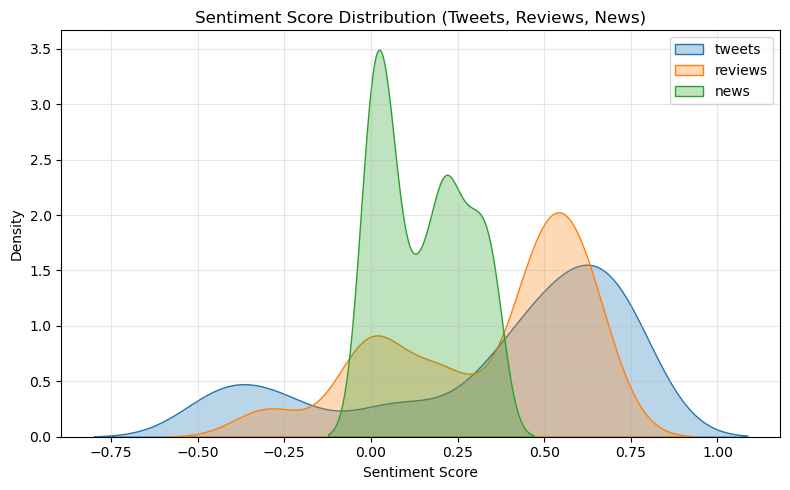


Sentiment Label Counts Summary:
                 tweets  reviews  news
sentiment_label                       
Positive            244      147   157
Negative             56       12     0
Neutral               0       41    93


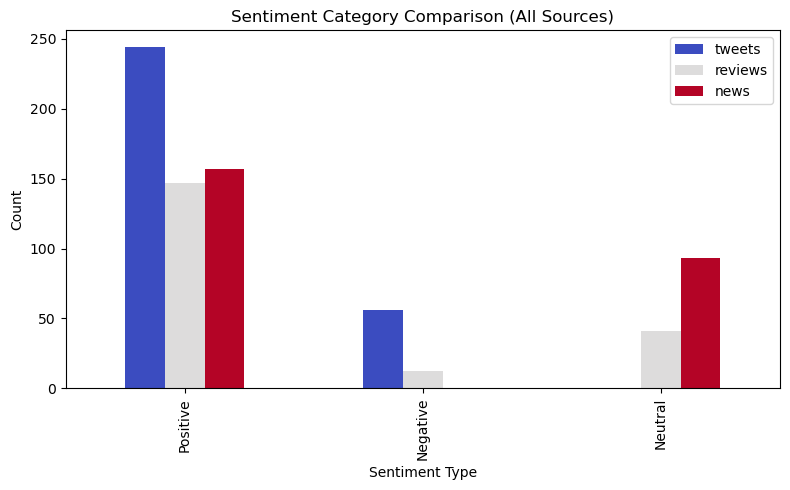

Tweets — Avg Sentiment: 0.36 | Dominant Tone: Positive
Reviews — Avg Sentiment: 0.34 | Dominant Tone: Positive
News — Avg Sentiment: 0.15 | Dominant Tone: Positive

Notebook 2 complete — sentiment datasets and visuals saved in /outputs/


In [3]:
# ============================================================
# NOTEBOOK 2 — Sentiment Analysis (Tweets, Reviews, News)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

# ---------- Setup ----------
nltk.download('vader_lexicon')

input_folder = "./data/"
output_folder = "./outputs/"

os.makedirs(output_folder, exist_ok=True)

# ---------- Load Cleaned Datasets ----------
files = {
    "tweets": "cleaned_tweets.csv",
    "reviews": "cleaned_reviews.csv",
    "news": "cleaned_news.csv"
}

datasets = {}
for name, file in files.items():
    path = os.path.join(output_folder, file) if os.path.exists(os.path.join(output_folder, file)) else os.path.join(input_folder, file)
    datasets[name] = pd.read_csv(path)
    print(f"Loaded {name}: {datasets[name].shape[0]} rows")

# ---------- Sentiment Analyzer ----------
vader = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    if not isinstance(text, str):
        return 0.0
    vader_score = vader.polarity_scores(text)["compound"]
    blob_score = TextBlob(text).sentiment.polarity
    return (vader_score + blob_score) / 2

# ---------- Apply Sentiment Analysis ----------
for name, df in datasets.items():
    if "cleaned_text" in df.columns:
        df["sentiment_score"] = df["cleaned_text"].apply(analyze_sentiment)
        df["sentiment_label"] = pd.cut(
            df["sentiment_score"],
            bins=[-1, -0.05, 0.05, 1],
            labels=["Negative", "Neutral", "Positive"]
        )
        datasets[name] = df
        print(f"Sentiment analysis complete for {name}")

# ---------- Save Enhanced Datasets ----------
for name, df in datasets.items():
    output_path = os.path.join(output_folder, f"{name}_with_sentiment.csv")
    df.to_csv(output_path, index=False)
    print(f"Saved: {output_path}")

# ============================================================
# Visualization 1: Sentiment Distribution Across Datasets
# ============================================================

plt.figure(figsize=(8, 5))
for name, df in datasets.items():
    sns.kdeplot(df["sentiment_score"], label=name, fill=True, alpha=0.3)
plt.title("Sentiment Score Distribution (Tweets, Reviews, News)")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "sentiment_distribution.png"))
plt.show()

# ============================================================
# Visualization 2: Sentiment Label Counts
# ============================================================

sentiment_counts = pd.concat([
    df["sentiment_label"].value_counts().rename(name)
    for name, df in datasets.items()
], axis=1).fillna(0).astype(int)

print("\nSentiment Label Counts Summary:")
print(sentiment_counts)

sentiment_counts.plot(kind="bar", figsize=(8,5), colormap="coolwarm")
plt.title("Sentiment Category Comparison (All Sources)")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "sentiment_category_counts.png"))
plt.show()

# ============================================================
# Key Insights
# ============================================================

for name, df in datasets.items():
    avg_sentiment = df["sentiment_score"].mean()
    dominant_label = df["sentiment_label"].mode()[0]
    print(f"{name.capitalize()} — Avg Sentiment: {avg_sentiment:.2f} | Dominant Tone: {dominant_label}")

print("\nNotebook 2 complete — sentiment datasets and visuals saved in /outputs/")
